# Abelian sandpile model

In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
#+--------+
#|********|
#|********|
#+--------+

In [2]:
def plotheatmap(u, t):
    fig, ax = plt.subplots()
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.title(f"Criticality = 8 | Slope 45")
    plt.xlabel("x")
    plt.ylabel("y")
  # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u[t,:,:], cmap=plt.cm.Greens, vmin=0, vmax=7)
    plt.colorbar(label='Number of grains')
    plt.savefig("sandpile"+str(t), dpi=100, bbox_inches='tight')
    return plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/pyplot.py'>

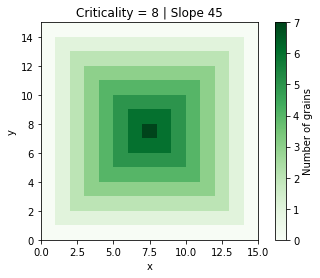

In [3]:
plate_length = 15
max_iter_time = 10000

# the structure of the solution u
u = np.empty((max_iter_time, plate_length, plate_length))

# initialize the condition 
u_initial = 1
# Set the initial condition
u.fill(u_initial)

# Boundary conditions for four sides 
u_top = 0
u_left = 0
u_bottom = 0
u_right = 0

# Set the boundary conditions for inner grid not including the plate side 
u[:, 0, 0:(plate_length)] = u_bottom 
u[:, 0:(plate_length), 0] = u_left
u[:, 0:(plate_length),(plate_length-1)] = u_right 
u[:, (plate_length-1), 0:(plate_length)] = u_top

for i in range(1,plate_length):
    u[0, i, i:(plate_length-i)] = i
    u[0, i:(plate_length-i), i] = i
    u[0, i:(plate_length-i),(plate_length-i-1)] = i
    u[0, (plate_length-i-1), i:(plate_length-i)] = i

stability_threshold = 8

plotheatmap(u, 0)
# np.arctan(2)*180/np.pi

In [4]:
# calculate u
def calculate(u,x,y,dt):
    # check all the possible vertices
    for t in range(0,max_iter_time-1,dt):
        u[t+1,:,:] = u[t,:,:]  # copy u at time t to u at t+1
        # heat on one side of the pyramide
        u[t+1,7,7] = u[t,7,7]+1
        for i in range(1, plate_length-1):
            for j in range(1, plate_length-1):
                if u[t,i,j] >= stability_threshold:
                     # avalanche!
                    u[t+1,i+1,j] = u[t,i+1,j] + 1
                    u[t+1,i-1,j] = u[t,i-1,j] + 1
                    u[t+1,i,j+1] = u[t,i,j+1] + 1
                    u[t+1,i,j-1] = u[t,i,j-1] + 1
        # diagnostic eliminate unstable point         
        for i in range(1, plate_length-1):
            for j in range(1, plate_length-1):
                if u[t,i,j] >= stability_threshold:
                    u[t+1,i,j] = u[t,i,j] - 4
        # clear plate boundary
        u[t+1, 0, 0:(plate_length)] = 0
        u[t+1, 0:(plate_length), 0] = 0
        u[t+1, 0:(plate_length),(plate_length-1)] = 0
        u[t+1, (plate_length-1), 0:(plate_length)] = 0
        #print("Iteration "+str(t)+" has been completed", end='\r')
    return u
u = calculate(u,1,1,1)

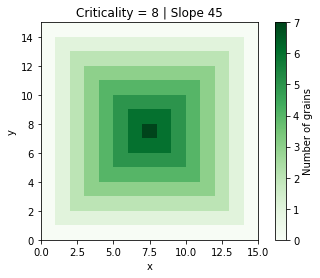

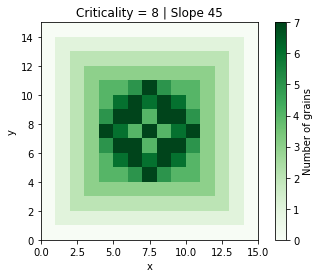

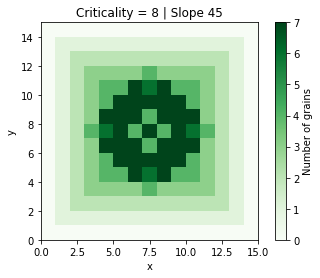

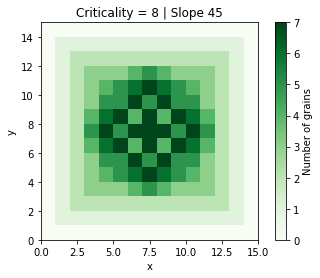

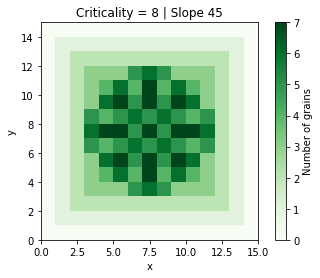

In [5]:
for t in range(0,1000,200):
    plotheatmap(u, t)
    print("Iteration "+str(t)+" has been completed", end='\r')
    #print(t)

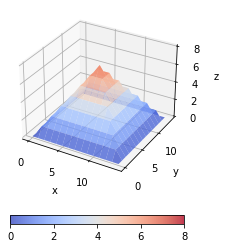

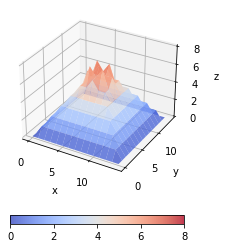

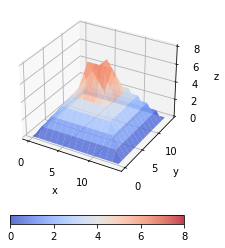

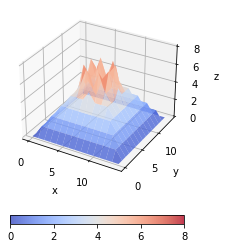

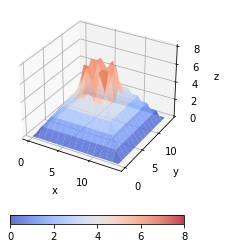

In [6]:
for i in range(0,100,20):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xx, yy = np.mgrid[0:plate_length, 0:plate_length]
    plot = ax.plot_surface(xx,yy, u[i], cmap = cm.coolwarm, alpha=0.8, linewidth=1, \
                          vmin = 0, vmax = 8)
    fig.colorbar(plot, fraction=0.04, orientation = 'horizontal')
    ax.axes.set_zlim3d(bottom=0, top=8) 
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    print("Frame "+str(i)+" has been completed", end='\r')
    plt.savefig('pile_'+str(i)+'.png', dpi=200, bbox_inches='tight')